# SVM

#### Support vector machine is a supervised  machine learning algorithm for both classification and regression tasks.
#### SVM is particularly effective in cases where the data is not linearly separable and requires mapping to a higher-dimensional 
#### space.

### Data

In [16]:
import pandas as pd
import math
import numpy as np
#a = tuple(input("enter the tuple ").split(','))
a = [(5),( 6), (3),(2),(4),(18),(8),(1),(11),(21),
     (6),(13),(19),(15),(11),(12),(14),(52),(57),
     (34),(48),(39),(16),(17),(89),(97),(79),(80)
     ,(85),(11),(15),(28),(45),(51),(34),(46),(36),(66),(98),(99)]
s = [int(x) for x in a]
k = type(a)

result = [(x, pow(x, 3)) for x in s]
result
X=pd.DataFrame(result,columns=['A','B'])
X['C']= [( pow(x, 2)) for x in s]
X['D']= [(2*x) for x in s]
X['E']= [(math.exp(x)) for x in s]
X['F']=[ pow(x, 3)/20 for x in s]

X.head()

,A,B,C,D,E,F
0,5,125,25,10,148.413159,6.25
1,6,216,36,12,403.428793,10.80
2,3,27,9,6,20.085537,1.35
3,2,8,4,4,7.389056,0.40
4,4,64,16,8,54.598150,3.20


#### Process of Binning to create a classification

In [25]:
F=np.linspace(X['A'].min(),X['A'].max(),3)

bins = F
labels = ['122', '222']
X['category'] = pd.cut(X['A'], bins=bins, labels=labels,include_lowest=True)
Z=X
Z.head()

,A,B,C,D,E,F,category
0,5,125,25,10,148.413159,6.25,122
1,6,216,36,12,403.428793,10.80,122
2,3,27,9,6,20.085537,1.35,122
3,2,8,4,4,7.389056,0.40,122
4,4,64,16,8,54.598150,3.20,122


In [4]:
import matplotlib.pyplot as plt

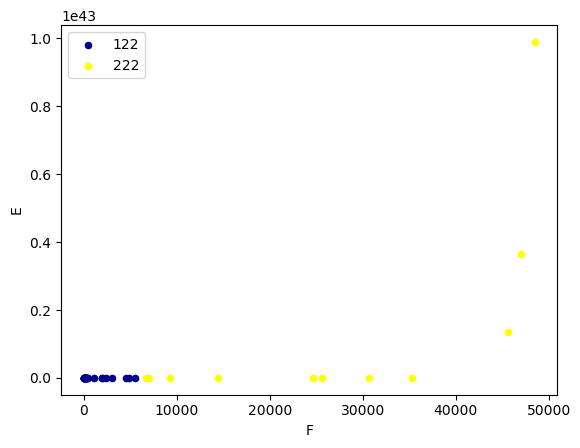

In [18]:
ax = Z[Z['category'] == '122'][0:39].plot(kind='scatter', x='F', y='E', color='DarkBlue', label='122');
Z[Z['category'] == '222'][0:39].plot(kind='scatter', x='F', y='E', color='Yellow', label='222', ax=ax);
plt.show()

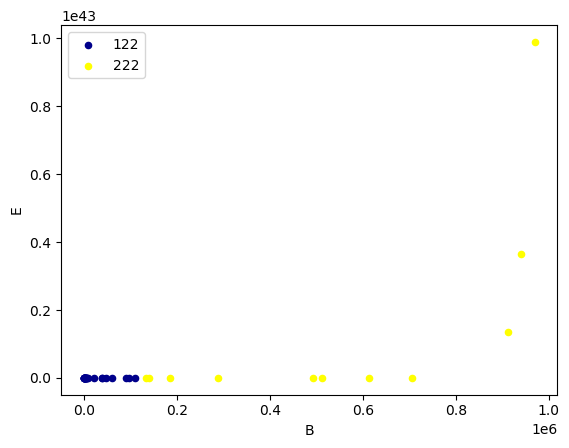

In [5]:
ax = Z[Z['category'] == '122'][0:39].plot(kind='scatter', x='B', y='E', color='DarkBlue', label='122');
Z[Z['category'] == '222'][0:39].plot(kind='scatter', x='B', y='E', color='Yellow', label='222', ax=ax);
plt.show()

### Applying SVM using column E,B,C to find category  'rbf' kernel is used

In [6]:
W=Z[['E','B','C']]
E=Z[['category']]

In [7]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

In [8]:
W=np.asarray(W)
E=np.asarray(E)

In [9]:
x_train, x_test, y_train, y_test = train_test_split( W, E, test_size=0.25, random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (30, 3) (30, 1)
Test set: (10, 3) (10, 1)


In [10]:
EBC = svm.SVC(kernel='rbf')
EBC.fit(x_train, y_train) 

/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [11]:
yhat = EBC.predict(x_test)
yhat 

array(['122', '122', '122', '122', '122', '122', '122', '122', '222',
       '122'], dtype=object)

In [12]:
y_test.T

array([['122', '122', '122', '222', '122', '122', '222', '222', '222',
        '122']], dtype=object)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, yhat, labels=['122','222'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         122       0.67      1.00      0.80         6
         222       1.00      0.25      0.40         4

    accuracy                           0.70        10
   macro avg       0.83      0.62      0.60        10
weighted avg       0.80      0.70      0.64        10



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

D = [[['A', 'B', 'C']], [['B', 'C', 'D']], [['E', 'B', 'C']], [['A']], [['B']]]
N = []

for i in range(len(D)):
    for F in D[i]:
        RC = F
        x1 = X[RC].values
        x2 = np.asarray(x1)
        y = X['category'].values  

        x_train, x_test, y_train, y_test = train_test_split(x2, y, test_size=0.35, random_state=4)
        clf = svm.SVC(kernel='rbf')
        clf.fit(x_train, y_train)
        yhat = clf.predict(x_test)
        
        K=['ABC', 'BCD', 'EBC', 'A', 'B']
        
        N.append(pd.DataFrame({K[i]: yhat}))

merged_df = pd.concat([pd.DataFrame({'ytest':y_test})] + N, axis=1)


merged_df


,ytest,ABC,BCD,EBC,A,B
0,222,222,222,122,222,222
1,222,222,222,222,222,222
2,122,122,122,122,122,122
3,122,122,122,122,122,122
4,222,222,222,122,222,222
5,122,122,122,122,122,122
6,122,122,122,122,122,122
7,122,122,122,122,122,122
8,122,122,122,122,122,122
9,122,122,122,122,122,122


#### In above code we tried to compare various columns and compare  there result and found that A and ABC 
#### shows satisfactory result.This is because the binning that we have done is done by using column 'A'.


In [41]:
B=merged_df.take([0],axis=1)
V=merged_df.take([4],axis=1) ### we can change number 4 as 1,2,3,5

from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(B, V, labels=['122','222'])
np.set_printoptions(precision=3)

C=pd.DataFrame(B,V).head()

print (classification_report(B,V))
print(cnf_matrix)

              precision    recall  f1-score   support

         122       1.00      1.00      1.00         9
         222       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

[[9 0]
 [0 5]]


### SVM using 'Linear ' kernel

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

D = [[['A', 'B', 'C']], [['B', 'C', 'D']], [['B', 'C']], [['A']], [['B']]]
N = []

for i in range(len(D)):
    for F in D[i]:
        RC = F
        x1 = Z[RC].values
        x2 = np.asarray(x1)
        y1 = Z['category'].values  

        x_train, x_test, y_train, y_test = train_test_split(x2, y1, test_size=0.35, random_state=4)
        clf = svm.SVC(kernel='linear')
        clf.fit(x_train, y_train)
        yhat = clf.predict(x_test)
        
        K=['ABC', 'BCD', 'BC', 'A', 'B']
        
        N.append(pd.DataFrame({K[i]: yhat}))

merged_df1 = pd.concat([pd.DataFrame({'ytest':y_test})] + N, axis=1)


merged_df1


,ytest,ABC,BCD,BC,A,B
0,222,222,222,222,222,222
1,222,222,222,222,222,222
2,122,122,122,122,122,122
3,122,122,122,122,122,122
4,222,222,222,222,222,222
5,122,122,122,122,122,122
6,122,122,122,122,122,122
7,122,122,122,122,122,122
8,122,122,122,122,122,122
9,122,122,122,122,122,122


In [43]:
B1=merged_df1.take([0],axis=1)
V1=merged_df1.take([1],axis=1)

from sklearn.metrics import classification_report, confusion_matrix
import itertools
cnf_matrix = confusion_matrix(B1, V1, labels=['122','222'])
np.set_printoptions(precision=3)

C=pd.DataFrame(B,V).head()

print (classification_report(B1,V1))
print(cnf_matrix)


              precision    recall  f1-score   support

         122       1.00      1.00      1.00         9
         222       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

[[9 0]
 [0 5]]


##### As we can observe from above that when we use 'Linear' kernel results come out to be accurate because the data we have was linear in nature.